In [16]:
# Notebook for code development for vehicle stock module (vsm)

# 21 Oct 2025 - don't trust the vehicle stock data from starter kit or ministry. basing everything off PKM --> better utility as it can be used without houndin' the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# INPUT DATA

In [17]:
# Temporarily store pkm_by_mode data here to be used
# Fixed data. Can replace by what Tang gives us.
def return_input_data(): # Fixed data (can replace by what Tang gives us)
    # === PASSENGER TRANSPORT (passenger-kilometres, million pkm) ===
    pkm_by_mode = {
        2018: {'BUS': 8281.15, 'CAR': 3011.33, 'MOTO': 1505.66,
               'WALK': 800, 'BIKE': 400, 'TRAIN': 2500, 'PLANE': 12000},
        2019: {'BUS': 8605.21, 'CAR': 3129.17, 'MOTO': 1564.58,
               'WALK': 820, 'BIKE': 420, 'TRAIN': 2600, 'PLANE': 12500},
        2020: {'BUS': 10027.35, 'CAR': 3646.31, 'MOTO': 1823.16,
               'WALK': 850, 'BIKE': 460, 'TRAIN': 2700, 'PLANE': 11000},  # pandemic dip
        2021: {'BUS': 11678.98, 'CAR': 4246.90, 'MOTO': 2123.45,
               'WALK': 870, 'BIKE': 500, 'TRAIN': 2900, 'PLANE': 13000},
        2022: {'BUS': 11492.00, 'CAR': 4178.91, 'MOTO': 2089.45,
               'WALK': 890, 'BIKE': 520, 'TRAIN': 3100, 'PLANE': 13500},
        2023: {'BUS': 12965.71, 'CAR': 4714.80, 'MOTO': 2357.40,
               'WALK': 910, 'BIKE': 550, 'TRAIN': 3400, 'PLANE': 14000},
        2024: {'BUS': 14571.56, 'CAR': 5298.75, 'MOTO': 2649.37,
               'WALK': 930, 'BIKE': 580, 'TRAIN': 3700, 'PLANE': 14500},
        2025: {'BUS': 16397.29, 'CAR': 5962.65, 'MOTO': 2981.32,
               'WALK': 950, 'BIKE': 610, 'TRAIN': 4000, 'PLANE': 15000},
        2026: {'BUS': 18357.96, 'CAR': 6675.62, 'MOTO': 3337.81,
               'WALK': 970, 'BIKE': 640, 'TRAIN': 4300, 'PLANE': 15600},
        2027: {'BUS': 20533.13, 'CAR': 7466.59, 'MOTO': 3733.30,
               'WALK': 990, 'BIKE': 670, 'TRAIN': 4600, 'PLANE': 16200},
        2028: {'BUS': 22984.39, 'CAR': 8357.96, 'MOTO': 4178.98,
               'WALK': 1010, 'BIKE': 700, 'TRAIN': 4900, 'PLANE': 16800},
        2029: {'BUS': 25706.56, 'CAR': 9347.84, 'MOTO': 4673.92,
               'WALK': 1030, 'BIKE': 730, 'TRAIN': 5200, 'PLANE': 17500},
        2030: {'BUS': 27706.56, 'CAR': 12047.84, 'MOTO': 6673.92,
               'WALK': 1050, 'BIKE': 760, 'TRAIN': 5500, 'PLANE': 18000}
    }

    # === FREIGHT TRANSPORT (tonne-kilometres, million tkm) ===
    tkm_by_mode = {
        2018: {'TRUCK': 200000, 'RAIL_FREIGHT': 60000, 'SHIP': 400000, 'AIR_FREIGHT': 1500},
        2019: {'TRUCK': 210000, 'RAIL_FREIGHT': 62000, 'SHIP': 410000, 'AIR_FREIGHT': 1600},
        2020: {'TRUCK': 190000, 'RAIL_FREIGHT': 58000, 'SHIP': 390000, 'AIR_FREIGHT': 1200},
        2021: {'TRUCK': 220000, 'RAIL_FREIGHT': 64000, 'SHIP': 420000, 'AIR_FREIGHT': 1700},
        2022: {'TRUCK': 225000, 'RAIL_FREIGHT': 66000, 'SHIP': 430000, 'AIR_FREIGHT': 1800},
        2023: {'TRUCK': 235000, 'RAIL_FREIGHT': 68000, 'SHIP': 440000, 'AIR_FREIGHT': 1900},
        2024: {'TRUCK': 245000, 'RAIL_FREIGHT': 70000, 'SHIP': 450000, 'AIR_FREIGHT': 2000},
        2025: {'TRUCK': 255000, 'RAIL_FREIGHT': 72000, 'SHIP': 460000, 'AIR_FREIGHT': 2100},
        2026: {'TRUCK': 265000, 'RAIL_FREIGHT': 74000, 'SHIP': 470000, 'AIR_FREIGHT': 2200},
        2027: {'TRUCK': 275000, 'RAIL_FREIGHT': 76000, 'SHIP': 480000, 'AIR_FREIGHT': 2300},
        2028: {'TRUCK': 285000, 'RAIL_FREIGHT': 78000, 'SHIP': 490000, 'AIR_FREIGHT': 2400},
        2029: {'TRUCK': 295000, 'RAIL_FREIGHT': 80000, 'SHIP': 500000, 'AIR_FREIGHT': 2500},
        2030: {'TRUCK': 310000, 'RAIL_FREIGHT': 82000, 'SHIP': 510000, 'AIR_FREIGHT': 2600}
    }

    # === OCCUPANCY / LOAD FACTORS ===
    occ_by_mode = {
        year: {
            # Passenger modes (passengers per vehicle)
            'BUS': 15,
            'CAR': 2,
            'MOTO': 1.5,
            'WALK': 1,
            'BIKE': 1,
            'TRAIN': 200,
            'PLANE': 150,
            # Freight modes (tonnes per vehicle)
            'TRUCK': 10,
            'RAIL_FREIGHT': 1000,
            'SHIP': 20000,
            'AIR_FREIGHT': 50
        }
        for year in range(2018, 2031)
    }

    # === AVERAGE ANNUAL KILOMETRAGE ===
    kilometrage_by_mode = {
        year: {
            'BUS': 31986,
            'CAR': 23023,
            'MOTO': 17807,
            'WALK': 3000,
            'BIKE': 1500,
            'TRAIN': 180000,
            'PLANE': 7000000,
            'TRUCK': 80000,
            'RAIL_FREIGHT': 100000,
            'SHIP': 600000,
            'AIR_FREIGHT': 3500000
        }
        for year in range(2018, 2031)
    }

    return pkm_by_mode, tkm_by_mode, occ_by_mode, kilometrage_by_mode

In [18]:
# return age data - EXISTING STOCK (based on GIZ INFRAS 2019 Kenya data)
def return_age_data_cumulative_stock():
    age_data = pd.read_excel('./../data/vehicle_stock/age_distribution.xlsx')
    return age_data

In [19]:
# return age data - NEW STOCK (based on Zambian vehicle registration data (Malindi))
def return_age_data_new_stock():
    new_age_data = pd.read_excel('./../data/vehicle_stock/age_distribution_new_vehicles.xlsx')
    return new_age_data

In [20]:
# return scrappage data - commented out, as replaced with Weibull parameter version
# def return_scrappage_data():
#     scrappage_data = pd.read_excel('./../data/vehicle_stock/scrappage_rates.xlsx')
#     return scrappage_data

# CALCULATE BASE YEAR STOCK

In [21]:
# old - decided 21/10 to not trust vehicle stock data.

# def get_base_year_stock(df, base_year, age_data=return_age_data_cumulative_stock(), vehicles=['BUS', 'CAR', 'MOTO']):#, 'MINIBUS', 'VAN', 'TRUCK']):
#     """Retrieves vehicle stock by mode for the base year (input data).
#
#     Args:
#         df: Country data. Currently built on country-specific data.
#         base_year: Integer. E.g. 2015.
#
#     Returns:
#         Dict with year as key and nested dict of mode:vehicles as value.
#     """
#
#     # Retrieve data from stock
#     base_year_stock = {base_year: {vehicle: {} for vehicle in vehicles}}
#     for vehicle in vehicles:
#         for age in age_data.Age.unique().tolist():
#             base_year_stock[base_year][vehicle][age] = np.round(df[df['Data code'] == f'ROAD_STOCK_CUM_{vehicle}'][base_year].item() * age_data[age_data['Age'] == age][[c for c in age_data.columns.tolist() if 'CAR' in c][0]].tolist()[0], 0) # TODO: this just takes the first matching age data. Improve with a better tech lookup.
#
#     return base_year_stock

In [22]:
def get_base_year_stock_from_pkm(
        pkm_by_mode,
        occ_by_mode,
        kilometrage_by_mode,
        age_data_cumulative,
        base_year=2018,
        vehicles=None):
    """
    Calculates base-year vehicle stock (by mode and age) directly from
    PKM, occupancy, and kilometrage — without using registration data.

    Args:
        pkm_by_mode (dict): Passenger-km by mode and year (million pkm).
        occ_by_mode (dict): Average occupancy per mode and year.
        kilometrage_by_mode (dict): Average annual kilometrage per vehicle.
        age_data_cumulative (DataFrame): Fractional age distribution (sums to 1 per mode).
        base_year (int): The year to use.
        vehicles (list): List of vehicle modes to include.

    Returns:
        dict: Nested dictionary {base_year: {vehicle: {age: vehicles}}}.
    """
    import numpy as np

    if vehicles is None:
        vehicles = list(pkm_by_mode[base_year].keys())

    base_year_stock = {base_year: {v: {} for v in vehicles}}

    for vehicle in vehicles:
        # 1. Calculate total fleet directly from PKM
        pkm = pkm_by_mode[base_year][vehicle] * 1e6  # convert million to units
        occ = occ_by_mode[base_year][vehicle]
        km = kilometrage_by_mode[base_year][vehicle]
        total_fleet = pkm / (occ * km)

        # 2. Apply age distribution (ensure normalised)
        col = [c for c in age_data_cumulative.columns if vehicle in c]
        if not col:
            raise ValueError(f"No age distribution found for {vehicle}")
        col = col[0]
        dist = age_data_cumulative[col].values
        dist = dist / np.sum(dist)  # normalize in case not summing to 1
        ages = age_data_cumulative['Age'].values

        # 3. Allocate total fleet by age
        for age, share in zip(ages, dist):
            base_year_stock[base_year][vehicle][age] = np.round(total_fleet * share, 0)

    return base_year_stock

In [23]:
# Scrappage data
def generate_scrappage_curves(max_age=30):
    """
    Generate scrappage rates (age-specific) for various modes, calibrated
    to Kenyan-like lifetimes.
    Returns DataFrame indexed by age, columns = modes, where values are
    scrappage rate from age → age+1.
    """
    # Kenya-calibrated parameters (Weibull survival)
    params = {
        'CAR':     {'eta': 14, 'beta': 3.0},
        'MOTO':    {'eta': 9,  'beta': 2.5},
        'BUS':     {'eta': 12, 'beta': 3.5},
        'TRUCK':   {'eta': 10, 'beta': 3.2},
        'TRAIN':   {'eta': 25, 'beta': 3.5},
        'PLANE':   {'eta': 25, 'beta': 3.0},
        'SHIP':    {'eta': 30, 'beta': 3.5}
    }

    ages = np.arange(0, max_age + 1)
    scrappage = pd.DataFrame(index=ages, columns=params.keys(), dtype=float)

    for mode, p in params.items():
        S = np.exp(- (ages / p['eta']) ** p['beta'])
        # Scrappage rate: proportion that exit between a and a+1
        # i.e. 1 - S(a+1)/S(a)
        # For final age, assume full scrappage
        rates = 1 - (S[1:] / S[:-1])
        # Append rate = 1 for last age (everything scrapped)
        rates = np.append(rates, 1.0)
        scrappage[mode] = rates

    return scrappage

In [24]:
# def get_base_year_new_stock(df, base_year, age_data=return_age_data_new_stock(), vehicles=['BUS', 'CAR', 'MOTO']):#, 'MINIBUS', 'VAN', 'TRUCK']):
#     """Retrieves new vehicle stock by mode for the base year (input data).
#
#     Args:
#         df: Country data. Currently built on country-specific data.
#         base_year: Integer. E.g. 2015.
#
#     Returns:
#         Dict with year as key and nested dict of mode:vehicles as value.
#     """
#
#     # Retrieve data from stock
#     base_year_new_stock = {base_year: {vehicle: {} for vehicle in vehicles}}
#     for vehicle in vehicles:
#         for age in age_data['age'].unique().tolist():
#             base_year_new_stock[base_year][vehicle][age] = np.round(df[df['Data code'] == f'ROAD_STOCK_NEW_{vehicle}'][base_year].item() * age_data[age_data['age'] == age][f'{vehicle}_{base_year}'].item(), 0)
#
#     return base_year_new_stock

# RETURN COUNTRY DATA

In [25]:
def return_country_data(country, start_year=1990, end_year=2022):
    try:
        df = pd.read_excel(f"./../data/country_data/{country}/{country}.xlsx")
        country_data = df[['Country name', 'Variable', 'Type','Sub-type', 'Fuel', 'Destination', 'Data code', 'Unit'] + [y for y in range(
            start_year, end_year)]]
        return country_data
    except Exception as e:
        return f"an error occurred: {e}"

# CALCULATE DESIRED STOCK

In [26]:
# function to return desired vehicle fleet based on demand. Using basic formula vehicle_fleet = PKM / (occupancy * kilometrage)
def calculate_desired_stock(pkm_by_mode, occ_by_mode, kilometrage_by_mode):
    """Calculates the desired vehicle fleet for each mode based on PKM, occupancy, and annual kilometrage.

    Args:
        pkm_by_mode (dict): A dictionary containing PKM values for each mode and year.
        occ_by_mode (dict): A dictionary containing average occupancy values for each mode and year.
        kilometrage_by_mode (dict): A dictionary containing average annual kilometrage values for each mode and year.

    Returns:
        dict: A dictionary containing the desired vehicle fleet for each mode and year.
    """

    desired_stock = {}

    for year, pkm_data in pkm_by_mode.items():
        desired_stock[year] = {}
        for mode, pkm in pkm_data.items():
            occupancy = occ_by_mode[year][mode]
            kilometrage = kilometrage_by_mode[year][mode]
            desired_stock[year][mode] = 1e6 * pkm / (occupancy * kilometrage)  # pkm in million km

    return desired_stock

# CALCULATE ANNUAL VEHICLE STOCKS

In [27]:
# end_year = 2030
#
# def calculate_vehicle_stocks(desired_stock, base_year_stock, base_year_new_stock, age_data_new_stock, scrappage_data, base_year=2018, end_year=2030, vehicles=['BUS', 'CAR', 'MOTO']):
#
#     # vehicles=['BUS', 'CAR', 'MOTO']# , 'MINIBUS', 'VAN', 'TRUCK']
#     scrappage_lookup = {'BUS':'BUS', 'CAR':'CAR', 'MOTO':'MOTO', 'MINIBUS':'LCV', 'VAN':'LCV', 'TRUCK':'HGV'}
#
#     # instantiate dictionaries to track stock and scrap annually
#     annual_stock = {base_year: base_year_stock[base_year]}  # (cumulative)
#     annual_scrap = {year: {vehicle: {} for vehicle in vehicles} for year in range(base_year, end_year+1)}  # (scrap in that year)
#     new_stock = {base_year: base_year_new_stock[base_year]}  # (new stock, can be second-hand: accounting for age profile
#
#     # calculate the latest year available in the new stock age data
#     latest_year = max([int(c.split('_')[-1]) for c in age_data_new_stock.columns.tolist() if '20' in c])
#
#     for year in range(base_year+1, end_year+1):
#
#         annual_stock[year] = {}
#         annual_scrap[year] = {}
#         new_stock[year] = {}
#
#         for vehicle in vehicles:
#
#             annual_stock[year][vehicle] = {}
#             annual_scrap[year][vehicle] = {}
#             new_stock[year][vehicle] = {}
#
#             for age in range(len(annual_stock[year-1][vehicle])-1):
#
#                 # calculate scrap in year y-1 based on the stock in y-1 and the scrappage probabilities (that are independent of time)
#                 annual_scrap[year-1][vehicle][age] = annual_stock[year-1][vehicle][age] * scrappage_data[scrappage_data['Age'] == age][scrappage_lookup[vehicle]].item()
#
#                 # calculate stock in year y (before the addition of new vehicles) by subtracting scrap (y-1) from stock (y-1)
#                 annual_stock[year][vehicle][age] = annual_stock[year-1][vehicle][age] - annual_scrap[year-1][vehicle][age]  # remove scrapped vehicles from the stock
#
#             # calculate new stock required: new stock required = desired stock[y] - actual stock[y-1] + scrap[y-1]
#             new_stock_required = desired_stock[year][vehicle] - sum(annual_stock[year-1][vehicle].values()) + sum(annual_scrap[year-1][vehicle].values())
#
#             # if less than zero, return zero.
#             if new_stock_required <= 0:
#                 new_stock_required = 0
#
#             # calculate age distribution of additional stock
#             for age in range(len(annual_stock[year-1][vehicle])-1):
#
#                 if f'{vehicle}_{year}' in age_data_new_stock.columns:
#                     new_stock[year][vehicle][age] = new_stock_required * age_data_new_stock[age_data_new_stock['age'] == age][f'{vehicle}_{year}'].item()
#
#                 else:
#                     new_stock[year][vehicle][age] = new_stock_required * age_data_new_stock[age_data_new_stock['age'] == age][f'{vehicle}_{latest_year}'].item()
#
#                 annual_stock[year][vehicle][age] += new_stock[year][vehicle][age]
#
#             # Age the fleet by shifting the age distribution down by one
#             for age in range(len(annual_stock[year][vehicle]) - 1, 0, -1):
#
#                 annual_stock[year][vehicle][age] = annual_stock[year][vehicle][age - 1]
#
#             annual_stock[year][vehicle][0] = 0
#
#     return annual_stock, new_stock


In [28]:
# New annual stock calculation (new scrappage data)
# def calculate_vehicle_stocks(
#         desired_stock,
#         base_year_stock,
#         base_year_new_stock,
#         age_data_new_stock,
#         scrappage_data,
#         base_year=2018,
#         end_year=2030,
#         vehicles=None):
#
#     """
#     Calculate annual vehicle stocks accounting for scrappage and new stock,
#     compatible with scrappage_data generated by generate_scrappage_curves_kenya().
#     """
#
#     if vehicles is None:
#         vehicles = ['BUS', 'CAR', 'MOTO']
#
#     # Initialize tracking dictionaries
#     annual_stock = {base_year: base_year_stock[base_year]}          # total stock by age
#     annual_scrap = {year: {v: {} for v in vehicles} for year in range(base_year, end_year + 1)}
#     new_stock = {base_year: base_year_new_stock[base_year]}
#
#     # Latest available year in new stock age data (for fallback)
#     latest_year = max([int(c.split('_')[-1]) for c in age_data_new_stock.columns if '20' in c])
#
#     for year in range(base_year + 1, end_year + 1):
#
#         annual_stock[year] = {}
#         annual_scrap[year] = {}
#         new_stock[year] = {}
#
#         for vehicle in vehicles:
#
#             annual_stock[year][vehicle] = {}
#             annual_scrap[year][vehicle] = {}
#             new_stock[year][vehicle] = {}
#
#             prev_stock = annual_stock[year - 1][vehicle]
#             max_age = len(prev_stock) - 1
#
#             for age in range(max_age):
#                 # Fetch scrappage rate (handle age beyond dataset)
#                 if age in scrappage_data.index and vehicle in scrappage_data.columns:
#                     scrap_rate = scrappage_data.loc[age, vehicle]
#                 else:
#                     scrap_rate = 1.0  # assume fully scrapped if beyond age range
#
#                 # Calculate number scrapped
#                 scrap = prev_stock[age] * scrap_rate
#                 annual_scrap[year - 1][vehicle][age] = scrap
#
#                 # Remaining stock (aged by one year)
#                 remaining = prev_stock[age] - scrap
#                 annual_stock[year][vehicle][age + 1] = remaining
#
#             # Calculate required new stock (difference between desired & actual)
#             new_stock_required = desired_stock[year][vehicle] - sum(annual_stock[year][vehicle].values())
#             new_stock_required = max(new_stock_required, 0)
#
#             # Distribute new stock by age profile
#             for age in range(max_age):
#                 col_name = f'{vehicle}_{year}' if f'{vehicle}_{year}' in age_data_new_stock.columns else f'{vehicle}_{latest_year}'
#                 share = age_data_new_stock.loc[age_data_new_stock['age'] == age, col_name].item()
#                 new_stock_age = new_stock_required * share
#
#                 new_stock[year][vehicle][age] = new_stock_age
#                 annual_stock[year][vehicle][age] = annual_stock[year].get(vehicle, {}).get(age, 0) + new_stock_age
#
#             # Set age 0 explicitly for new stock total
#             annual_stock[year][vehicle][0] = sum(new_stock[year][vehicle].values())
#
#     return annual_stock, new_stock

In [29]:
def calculate_vehicle_stocks(
        desired_stock,
        base_year_stock,
        age_data_new_stock,
        scrappage_data,
        base_year=2018,
        end_year=2030,
        vehicles=None,
        shrink_strategy="none"  # "none" or "proportional_retirement"
    ):
    """
    PKM-driven annual stock evolution with scrappage & aging.
    No base_year_new_stock is required; annual additions are derived
    from the PKM-implied desired stock each year.

    Inputs:
      - desired_stock: dict[year][vehicle] -> total vehicles desired (from PKM/occ/km)
      - base_year_stock: dict[base_year][vehicle][age] -> initial age distribution
      - age_data_new_stock: DataFrame with columns like "<VEHICLE>_<year>" holding
        shares of additions by age for that year (or latest available year as fallback).
        This lets you represent imported used vehicles (age>0 on entry).
      - scrappage_data: DataFrame indexed by age with columns = vehicle (scrap rate from age->age+1)
      - shrink_strategy:
          "none" -> no accelerated scrappage if oversupplied
          "proportional_retirement" -> scale down each age bucket proportionally to meet target

    Returns:
      - annual_stock: dict[year][vehicle][age] -> vehicles
      - annual_additions: dict[year][vehicle][age] -> vehicles added that year (by age)
      - annual_scrap: dict[year][vehicle][age] -> vehicles scrapped in that year
    """
    import numpy as np

    if vehicles is None:
        # default to vehicles present in the base_year_stock
        vehicles = list(base_year_stock[base_year].keys())

    # Init outputs
    annual_stock = {base_year: base_year_stock[base_year].copy()}
    annual_scrap = {year: {v: {} for v in vehicles} for year in range(base_year, end_year + 1)}
    annual_additions = {year: {v: {} for v in vehicles} for year in range(base_year + 1, end_year + 1)}

    # Find last available year-specific column for new-stock age profile (fallback)
    latest_year = max([int(c.split('_')[-1]) for c in age_data_new_stock.columns if '20' in c])

    for year in range(base_year + 1, end_year + 1):
        annual_stock[year] = {}

        for vehicle in vehicles:
            prev_stock = annual_stock[year - 1][vehicle]
            max_age_prev = max(prev_stock.keys())
            # Ensure dense ages 0..max_age_prev
            # (some dicts may be sparse; fill missing ages with 0)
            prev_vector = np.array([prev_stock.get(a, 0.0) for a in range(max_age_prev + 1)])

            # --- 1) Scrappage on last year's stock ---
            ages = np.arange(len(prev_vector))
            # scrap rates by age (fallback to 1.0 beyond provided range)
            if vehicle in scrappage_data.columns:
                scrap_rates = np.array([
                    scrappage_data.loc[a, vehicle] if a in scrappage_data.index else 1.0
                    for a in ages
                ])
            else:
                # If no column for this vehicle, assume aggressive scrappage to avoid infinite aging
                scrap_rates = np.ones_like(ages, dtype=float)

            scrapped = prev_vector * scrap_rates
            survived = prev_vector - scrapped

            # Record scrappage for year-1 (scrap happens between y-1 and y)
            for a, s in enumerate(scrapped):
                annual_scrap[year - 1][vehicle][a] = float(s)

            # --- 2) Age survivors +1 year ---
            aged = np.zeros(len(survived) + 1)
            aged[1:] = survived  # everyone gets 1 year older

            # --- 3) Compute the gap to desired stock (before adding new vehicles) ---
            current_total = aged.sum()
            target_total = desired_stock[year][vehicle]
            gap = target_total - current_total

            # --- 4) Additions if gap > 0 (distribute by 'new stock' age profile) ---
            additions_by_age = np.zeros_like(aged)
            if gap > 0:
                # Pick this year's column or fallback to latest available
                col_name = f'{vehicle}_{year}' if f'{vehicle}_{year}' in age_data_new_stock.columns else f'{vehicle}_{latest_year}'

                # Get age shares; normalize to sum=1 (if column missing or all zeros, default to age 0)
                if col_name in age_data_new_stock.columns:
                    shares_series = age_data_new_stock[col_name]
                    # Align ages of the shares to our vector length; pad/truncate as needed
                    share_ages = age_data_new_stock['age'].values.astype(int)
                    shares = np.zeros_like(aged)
                    for a, sh in zip(share_ages, shares_series.values):
                        if a < len(shares):
                            shares[a] = sh
                    total_sh = shares.sum()
                    if total_sh <= 0:
                        shares[0] = 1.0
                        total_sh = 1.0
                    shares /= total_sh
                else:
                    shares = np.zeros_like(aged)
                    shares[0] = 1.0  # all new at age 0 as a safe default

                additions_by_age = gap * shares
                aged += additions_by_age

                # Record additions for reporting
                for a, add in enumerate(additions_by_age):
                    if add > 0:
                        annual_additions[year][vehicle][a] = float(add)

            # --- 5) Optional shrink if oversupplied (gap < 0) ---
            elif gap < 0 and shrink_strategy == "proportional_retirement":
                # scale all ages down proportionally so sum(aged) == target_total
                scale = target_total / current_total if current_total > 0 else 0.0
                aged *= scale
                # (no need to record a special "extra scrap": it’s an abstract adjustment)

            # Save year’s stock by age (as dict)
            annual_stock[year][vehicle] = {int(a): float(v) for a, v in enumerate(aged)}

    return annual_stock, annual_additions, annual_scrap


# RUN-THROUGH EXAMPLE


BUS — base year total: 17,260  target year total: 57,747
  Difference from target (2030): -0.00

CAR — base year total: 65,400  target year total: 261,648
  Difference from target (2030): -0.00

MOTO — base year total: nan  target year total: nan
  Difference from target (2030): nan


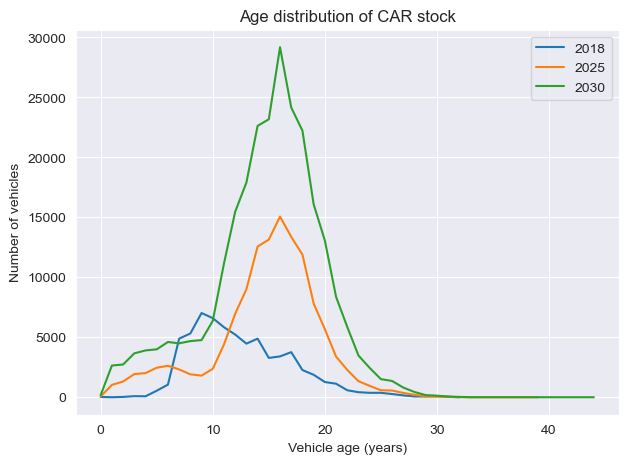

In [30]:
# === VEHICLE STOCK MODEL (PKM-BASED) ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. INPUT DATA
# ---------------------------------------------------------------------

# Use your existing helper
pkm_by_mode, tkm_by_mode, occ_by_mode, kilometrage_by_mode = return_input_data()

base_year = 2018
end_year = 2030
vehicles = ['BUS', 'CAR', 'MOTO']

# ---------------------------------------------------------------------
# 2. AGE DISTRIBUTION DATA (fractions by age)
# ---------------------------------------------------------------------
age_data = return_age_data_cumulative_stock()      # for existing fleet
age_data_new_stock = return_age_data_new_stock()   # for new entrants (e.g. used imports)

# ---------------------------------------------------------------------
# 3. SCRAPPAGE DATA (Kenya-calibrated)
# ---------------------------------------------------------------------
scrappage_data = generate_scrappage_curves(max_age=30)

# ---------------------------------------------------------------------
# 4. CALCULATE BASE-YEAR STOCK DIRECTLY FROM PKM
# ---------------------------------------------------------------------
base_year_stock = get_base_year_stock_from_pkm(
    pkm_by_mode,
    occ_by_mode,
    kilometrage_by_mode,
    age_data_cumulative=age_data,
    base_year=base_year,
    vehicles=vehicles
)

# ---------------------------------------------------------------------
# 5. CALCULATE DESIRED STOCK FOR EACH YEAR (PKM-driven)
# ---------------------------------------------------------------------
desired_stock = calculate_desired_stock(pkm_by_mode, occ_by_mode, kilometrage_by_mode)

# ---------------------------------------------------------------------
# 6. CALCULATE ANNUAL STOCK EVOLUTION (NO BASE_YEAR_NEW_STOCK NEEDED)
# ---------------------------------------------------------------------
annual_stock, annual_additions, annual_scrap = calculate_vehicle_stocks(
    desired_stock=desired_stock,
    base_year_stock=base_year_stock,
    age_data_new_stock=age_data_new_stock,
    scrappage_data=scrappage_data,
    base_year=base_year,
    end_year=end_year,
    vehicles=vehicles,
    shrink_strategy="none"   # or "proportional_retirement"
)

# ---------------------------------------------------------------------
# 7. VALIDATION CHECKS
# ---------------------------------------------------------------------
for v in vehicles:
    totals = [sum(annual_stock[y][v].values()) for y in range(base_year, end_year + 1)]
    targets = [desired_stock[y][v] for y in range(base_year, end_year + 1)]
    print(f"\n{v} — base year total: {totals[0]:,.0f}  target year total: {totals[-1]:,.0f}")
    print(f"  Difference from target (2030): {targets[-1] - totals[-1]:,.2f}")

# ---------------------------------------------------------------------
# 8. OPTIONAL VISUALISATION
# ---------------------------------------------------------------------
def plot_age_distribution(vehicle, years=[2018, 2025, 2030]):
    plt.figure(figsize=(7,5))
    for y in years:
        ages = list(annual_stock[y][vehicle].keys())
        stock = list(annual_stock[y][vehicle].values())
        plt.plot(ages, stock, label=str(y))
    plt.title(f"Age distribution of {vehicle} stock")
    plt.xlabel("Vehicle age (years)")
    plt.ylabel("Number of vehicles")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: plot cars over time
plot_age_distribution('CAR')